### Data Science Lab - #2

__1.1 Matplotlib availability__

In [1]:
from random import gauss
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
l = [gauss(0, 1) for _ in range(500)]
plt.hist(l, bins = 20)
plt.title('Gaussian distribution (mu=0, sigma=1)')
plt.show()


__Global Land Temperature__<br>
The Global Land Temperature (GLT) dataset is a large collection of measurements actively maintained
by Berkeley Earth. It contains the raw source data measured with stations all around the globe, plus an intermediate format and several formatted output files.<br>Data span from ∼1750 up to recent days with monthly and daily availability. <br>Measurements are provided by hemispheres, states, countries, cities and more. <br>You can read more about the dataset at the Berkeley Earth website.<br>
For the purpose of this laboratory you will work on a modified, smaller but dirtier, version of the
original GLT dataset, to stress the importance of data preprocessing. <br>More specifically, this didactic version
contains the formatted output files of the major cities of the globe with monthly granularity. <br>For the sake of
simplicity, the analysis will range between almost two centuries (i.e. between the years 1817 and 2012).
<br>The dataset is composed of ∼200k rows corresponding to the measurements taken the first day of the
month in a given city. <br>Each measurement is then described by 7 values:
- Date, when the measurement was taken
- AverageTemperature
- AverageTemperatureUncertainty
- City, from which the measurement was taken
- Country
- Latitude
- Longitude<br>

The dataset is available in CSV format. You can find it at the following URL
https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv

In [ ]:
! python -m wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv -o GLT_filtered.csv

IMDb reviews
Internet Movie Database (IMDb) is a popular online platform that gathers many information related to
multimed like movies, tv shows, video games and many more.<br><br>You can navigate to its website to explore
the huge amount of updated content it offers.<br><br>The only difference with the previously used CSV datasets
is that, in this one, the first row of the file contains a “header” (i.e.<br>the name of each column).<br>You should skip the first row and start reading from the second one on.
IMDb has soon become a rich data source for the scientific community.<br>Among the others, people’s
reviews are one of the most important types of data that can be retrieved from the platform.<br>The collection of reviews on a specific movie, for example, contains intrinsic information about its approval rating.
Therefore, a considerable amount of recent science works has addressed the identification of the sentiment
within textual reviews and surveys.<br>In the context of movie reviews, the sentiment analysis would seek to
discover if the reviewer liked the movie or not based on the content of the text, with the sentiment being
represented as numerical value (e.g.<br>a score between 1 and 10) or a binary one (e.g Positive or Negative).
Wikipedia provides a general overview on the topic of sentiment analysis.
During this laboratory you will work on the dataset collected and used by Maas et al.<br>2011.<br>We will
focus on a smaller portion of the whole dataset, known as the training data (you will learn more on
training and test datasets).<br>It contains 25, 000 user reviews collected from IMDb for different movies.
Since each review has also a numerical score between 1 and 10, the authors considered the ones with
a score lower than 4 to have a negative sentiment, while the ones with a score higher than 6 to have a
positive sentiment.<br>The dataset includes 12, 500 positive and 12, 500 negative reviews.<br>For the purpose of
this laboratory, reviews, which originally came in different files, have been organized in a single CSV file.
Each line of the file refers to a single review and has two fields:
1.<br>the textual comment;
Info: you do not have to handle commas inside the text.<br>Each comment comes surrounded by
the ¨ character which helps the csv module to properly split the fields for you.
i
2.<br>a binary value indicating either the positive or negative sentiment, represented respectively by a ’1’ and a ’0’.
Here it is a pseudo-representation of the first lines of your dataset:
- review,label
- <review_text>,1
- <review_text>,1
- <review_text>,0


In [ ]:
! python -m wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/aclimdb_reviews_train.txt -o imdb_rev_train.txt

### 2.1 Data preprocessing on Global Land Temperature


1. Load the Global Land Temperature dataset as a list of lists. Before starting, take a moment to better inspect the attributes you are going to work on. How many of them are nominal, how many
continuous or discrete?

In [2]:
import csv
import numpy as np
import pandas as pd
from pprint import pprint

In [ ]:
temp_data = []
file = 'GLT_filtered.csv'
with open(file, encoding= "utf8", mode= "r") as f:
    #labels = next(f)
    next(f)
    temp_data = [row for row in csv.reader(f)]


In [ ]:
pprint(temp_data[:10], indent = 2, compact = True)

__Variable Types__

![](vars.png)

__Discrete data:__ when the variable is restricted to specific defined values<br>For example, "male" or "female" are categorical discrete data values<br>Mortality (eg 20 patients dead at 6 months) is an example of numerical discrete data values<br>There can be no 20.5 dead patients<br> 

__Continuous  data:__ when the variable is unrestricted and can have any value from a potentially infinite range, eg<br>"blue" and "red" might be the categorical data range but the true value can be any subtle shade of purple<br>An example of numeric continuous data is weight - i.e. one does not have to be exactly 65 or 70 kg; one may easily be 67.5567kg.

Continuous Variables of our data:

    AverageTemperature
    AverageTemperatureUncertainty
    Latitude
    Longitude
    
Categorical/nominal Variables of our data:

    City
    Country

Ratio Variables

    AverageTemperature
    AverageTemperatureUncertainty

Interval Variables

    Latitude
    Longitude


Nominal data: the range of values is not ordered in any sense, but simply named (hence the nom). Again, blood groups, gender, etc. This is a form of categorical data.

Ordinal data: the range of values is ordered along a scale, e.g. disease staging (advanced, moderate, mild) or degree of pain (severe, moderate, mild, none). 

- Qualitative data: described by a characteristic
  - Categorical (i.e. described as a category)
    - Nominal data: an unordered list of categories
- Quantitative data: described by a numerical scale
  - Numerical (i.e. described as a number)
    - Ordinal (in a scale, or ordered by magnitide)
    - Discrete (where the data plugs into a limited range of values)
    - Continuous (where there is an infinite range of possible values)
        - Interval (no true zero value)
        - Ratio (there is a true zero value)

2. Analyze the attribute AverageTemperature, which contains missing values.  
Fill any gap with the arithmetic mean among the closest antecedent and the closest successive measurements in time, taken in the same city.  
Assume the following rules for edge cases:  

__(a)__ it can happen that a missing value does not have a preceding (or successive) measurement.
This happens when the missing value is the first (or last) value of the dataset.  
If this is the case, consider the missing value to be preceded (or followed) by a 0, then compute the mean
accordingly.
```
    original_list = [ '', 5, 6, '' ]  
    step_1 = [ 2.5, 5, 6, '' ] # (0 + 5) / 2  
    step_2 = [ 2.5, 5, 6, 3 ] # (6 + 0) / 2  
```
__(b)__ if there are consecutive missing values, just compute them in temporal order and use the newly
inserted values to evaluate the following ones.  
Here it is an example with a simple list where both (a) and (b) rules have been applied:
```
    original_list = [ '', '', 24, 28.9 ]
    step_1 = [ 12, '', 24, 28.9 ] # (0 + 24) / 2
    step_2 = [ 12, 18, 24, 28.9 ] # (12 + 24) / 2
```

In [ ]:
labels = {i:x for i,x in enumerate(labels.strip().split(","))}


In [35]:
labels

{0: 'Date',
 1: 'AverageTemperature',
 2: 'AverageTemperatureUncertainty',
 3: 'City',
 4: 'Country',
 5: 'Latitude',
 6: 'Longitude'}

In [3]:
from copy import deepcopy

In [ ]:
? deepcopy

In [ ]:
temp_data_copy = deepcopy(temp_data)

In [ ]:
# Total missing values
sum([x[1] == "" for x in temp_data])

In [36]:
temp_data = deepcopy(temp_data_copy)

In [37]:
def prev_next_temp(temp_data, i):
    prev_temp, next_temp = "_","_"
    if i == 0 or temp_data[i - 1][3] != temp_data[i][3]:
        #starting line of file, or city
        prev_temp = "0"
    else:
        prev_temp = temp_data[i - 1][1]

    while temp_data[i][1] == "":
        i += 1
        if i == len(temp_data) - 1 or temp_data[i - 1][3] != temp_data[i][3]:
            # last line of file or a new city started
            return (prev_temp, "0")

    return prev_temp, temp_data[i][1]

for i in range(len(temp_data)):
    if temp_data[i][1] == "":
        # Avg Temprature is missing
        prev_temp, next_temp = prev_next_temp(temp_data, i)
        avg_temp = eval(f"({prev_temp} + {next_temp})/2")
        temp_data[i][1] = str(avg_temp)
        #print(prev_temp, next_temp, avg_temp)

In [38]:
# Total missing values
sum([x[1] == "" for x in temp_data])

0

It means that we have a non empty value for all Cities as their Avg Temprature.  
lets convert Them to floating point with a decent precision.

In [68]:
for i in range(len(temp_data)):
    temp_data[i][1] = float(temp_data[i][1]).__round__(5)

3. Define a function that, given the name of a city and an integer N > 0,  
prints:  
- the top N hottest measurements;
- the top N coldest measurements.

In [76]:
def find_N_min_max_temps(temp_data, city, N):
    # filter on the base of city
    city_temps = [x for x in temp_data if x[3] == city]
    city_temps.sort(key = lambda x: x[1])
    print(f"the top {N} coldest measurements for {city} are:")
    pprint(city_temps[:N+1], compact= True, width= 100)
    print(f"\n\n the top {N} hottest measurements for {city} are:")
    pprint(city_temps[-N:], compact= True, width= 100)
    


In [77]:
city = "Lahore"
N = 5
find_N_min_max_temps(temp_data, city, N)

the top 5 coldest measurements for Lahore are:
[['1905-02-01', 9.343, '0.493', 'Lahore', 'Pakistan', '31.35N', '73.51E'],
 ['1964-01-01', 9.864, '0.24600000000000002', 'Lahore', 'Pakistan', '31.35N', '73.51E'],
 ['1934-01-01', 9.936, '0.4970000000000001', 'Lahore', 'Pakistan', '31.35N', '73.51E'],
 ['1899-01-01', 10.202, '0.722', 'Lahore', 'Pakistan', '31.35N', '73.51E'],
 ['1819-01-01', 10.219, '2.306', 'Lahore', 'Pakistan', '31.35N', '73.51E'],
 ['1905-01-01', 10.261, '0.7609999999999999', 'Lahore', 'Pakistan', '31.35N', '73.51E']]


 the top 5 hottest measurements for Lahore are:
[['1984-06-01', 35.596, '0.319', 'Lahore', 'Pakistan', '31.35N', '73.51E'],
 ['2012-06-01', 35.649, '0.245', 'Lahore', 'Pakistan', '31.35N', '73.51E'],
 ['1995-06-01', 35.878, '0.384', 'Lahore', 'Pakistan', '31.35N', '73.51E'],
 ['1919-06-01', 36.211, '0.768', 'Lahore', 'Pakistan', '31.35N', '73.51E'],
 ['1947-06-01', 36.346, '0.299', 'Lahore', 'Pakistan', '31.35N', '73.51E']]


4. (*) Let’s search for other anomalies in data distribution with the help of matplotlib.  
Plot the distribution of the average land temperatures for Rome and Bangkok using the aforementioned histogram
plotting function.  
Info: calling the plt.hist() method twice will draw the second histogram onto the canvas  
generated by the first call.

As you can see, Rome and Bangkok have very different temperature distributions, but this seems
plausible. What it looks strange is the large difference in their temperatures’ magnitude. Is it possible
that all sensors from Bangkok stations, along the entire time-span, were faulty? Could they were
configured to use another representation of the temperature measurement? Can you figure out a
data cleaning step to solve it?
Before continuing, try to answer to these questions

In [79]:
rome_temps = [x[1] for x in temp_data if x[3] == "Rome"]
Bangkok_temps = [x[1] for x in temp_data if x[3] == "Bangkok"]
len(rome_temps), len(Bangkok_temps)

(2352, 2352)

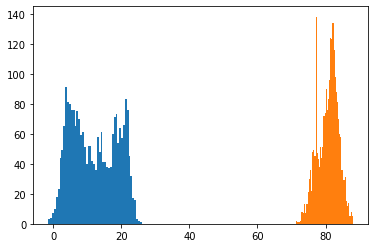

In [82]:
plt.hist(rome_temps, bins = 50)
plt.hist(Bangkok_temps, bins = 50);

It seems like the dataset from Bangkok has the tempratures represented as °F.  
let's convert them to °C.

5. (*) One might think that Bangkok sensors provide temperature samples in degrees Fahrenheit while
the ones located in Rome use the Celsius notation, which is the common representation in the whole
dataset. Write a function to transform Fahrenheit measurements back to Celsius, apply it to your
data and plot the two distribution again.  
Info: remember that the mapping function from Celsius to Fahrenheit is the following
TF = 1.8 · TC + 32


In [86]:
fh_to_cs = lambda x: ((x - 32) * 5) / 9
Bangkok_temps_cs = [fh_to_cs(x) for x in Bangkok_temps]

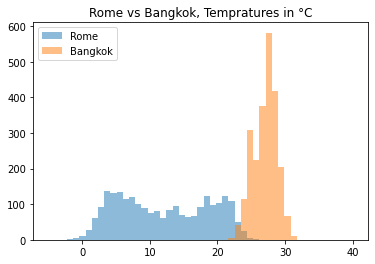

In [117]:
bins = np.linspace(-5,40,50)
plt.hist(rome_temps, bins = bins, alpha = 0.5, label = "Rome")
plt.hist(Bangkok_temps_cs, bins = bins, alpha = 0.5, label = "Bangkok")
plt.title("Rome vs Bangkok, Tempratures in °C")
plt.legend(loc = "upper left");

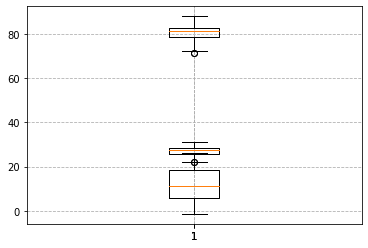

In [114]:
plt.boxplot(rome_temps)
plt.boxplot(Bangkok_temps)
plt.boxplot(Bangkok_temps_cs)
plt.grid(linestyle='--');

__2.2 Textual data preparation on IMDB reviews__  
This exercise is meant to get you acquainted with the preprocessing of textual data.  
You can find useful
information about Information Retrieval theory in the book "Introduction to Information Retrieval" (Manning, Raghavan, and Schütze 2008) also available at Introduction to Information Retrieval Stanford web
page.


1. Load the IMDb dataset as a list of lists

In [7]:
file = "imdb_rev_train.txt"
with open(file, encoding= "utf8") as f:
    next(f)
    imdb_data = [row for row in csv.reader(f)]

In [8]:
len(imdb_data)

25000

In [10]:
imdb_data[:2]

[['For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.',
  '1'],
 ["Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.",
  '0']]

Apply the tokenization function listed below to your reviews.  
Please refer to the function’s docstring for the input and output parameters.  
The tokenization procedure splits each comment in tokens (i.e. separate words).


In [11]:
import string
def tokenize(docs):
    """Compute the tokens for each document.
    Input: a list of strings. Each item is a document to tokenize.
    Output: a list of lists. Each item is a list containing the tokens of the
    relative document.
    """
    tokens = []
    for doc in docs:
        for punct in string.punctuation:
            doc = doc.replace(punct, " ")
        split_doc = [ token.lower() for token in doc.split(" ") if token ]
        tokens.append(split_doc)
    return tokens

__3.__ The next step requires the computation of the term frequency (TF) of each token within its respective
document.  
Although there exist different techniques to evaluate the frequency, we will now assume
that the TF of a token t in a document d is equal to the number of occurrences of t in d.  
Compute the TF for all your reviews.

In [16]:
from collections import Counter as cnt

In [17]:
docs = [row[0] for row in imdb_data]
tokens = tokenize(docs)

In [20]:
pprint(tokens[:2], compact= True)

[['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are',
  'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem',
  'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny',
  'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni',
  'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the',
  'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt'],
 ['working', 'with', 'one', 'of', 'the', 'best', 'shakespeare', 'sources',
  'this', 'film', 'manages', 'to', 'be', 'creditable', 'to', 'it', 's',
  'source', 'whilst', 'still', 'appealing', 'to', 'a', 'wider', 'audience',
  'br', 'br', 'branagh', 'steals', 'the', 'film', 'from', 'under', 'fishburne',
  's', 'nose', 'and', 'there', 's', 'a', 'talented', 'cast', 'on', 'good',
  'form']]


In [25]:
TFs = [dict(cnt(row)) for row in tokens]


In [26]:
pprint(TFs[:2], compact= True)

[{'a': 5,
  'absolute': 1,
  'actually': 1,
  'alan': 1,
  'an': 1,
  'are': 1,
  'as': 1,
  'character': 1,
  'for': 3,
  'funny': 1,
  'gem': 1,
  'gets': 1,
  'hale': 1,
  'imagine': 1,
  'is': 3,
  'joe': 1,
  'jr': 1,
  'listed': 1,
  'lot': 1,
  'maureen': 1,
  'memorable': 1,
  'moroni': 1,
  'movie': 2,
  'no': 1,
  'of': 1,
  'piscopo': 1,
  'police': 1,
  'quotes': 1,
  'respect': 1,
  'scene': 1,
  'scream': 1,
  'sgt': 1,
  'skipper': 1,
  'stapleton': 1,
  'stealer': 1,
  'sure': 1,
  'that': 1,
  'the': 2,
  'there': 1,
  'this': 1,
  'watch': 1,
  'where': 1},
 {'a': 2,
  'and': 1,
  'appealing': 1,
  'audience': 1,
  'be': 1,
  'best': 1,
  'br': 2,
  'branagh': 1,
  'cast': 1,
  'creditable': 1,
  'film': 2,
  'fishburne': 1,
  'form': 1,
  'from': 1,
  'good': 1,
  'it': 1,
  'manages': 1,
  'nose': 1,
  'of': 1,
  'on': 1,
  'one': 1,
  's': 3,
  'shakespeare': 1,
  'source': 1,
  'sources': 1,
  'steals': 1,
  'still': 1,
  'talented': 1,
  'the': 2,
  'there': 1,
 

__4.__ We will now compute the inverse document frequency (IDF).  
While the TF gives an idea of the weight of a token within a document, the IDF is used to find its significance among the entire collection of documents (i.e. your reviews).  
One possible way of computing it is:

    IDFt = log N / DFt


In [28]:
# where N is the number of documents
N = len(docs)
N

25000

__DFt is the document frequency of a token__  
i.e. the number of documents in which t appears at least once.
As you can see, IDFt ∈ \[0, log N\].  
Furthermore, __a low value means that the token appears in the majority of the documents, hence its presence is not relevant to characterize any subset of them, whereas an high value indicates relevance for a few
documents.__

__ (a) Compute the DF for all of your tokens;__


<span style="color:DarkSlateGray">
<br>
we take all unique tokens from a document, and merge them with unique tokens of other document<br>
unique tokens of a doc are keys of TFs dicts

In [32]:
# we take all unique tokens from a document, and merge them with unique tokens of other document
# unique tokens of a doc are keys of TFs dicts
all_tokens = []
for tokens_dict in TFs:
    all_tokens.extend(tokens_dict.keys())

In [37]:
# we count the occurance of tokens in this new list
DFt = dict(cnt(all_tokens))

In [45]:
DFt["data"], DFt["is"], DFt["the"], DFt["key"], DFt["to"], DFt["future"]

(37, 22427, 24793, 388, 23475, 761)

__(b) Compute the IDF for all of your tokens;__


In [53]:
IDFt = {token: log(N/DFt[token]).__round__(5) for token in DFt}

In [54]:
IDFt["data"], IDFt["is"], IDFt["the"], IDFt["key"], IDFt["to"], IDFt["future"]

(6.51571, 0.10861, 0.00831, 4.16563, 0.06294, 3.492)

__(c) Try to sort the IDF values in ascending order.__  
Which tokens (i.e. words) came to the top? Can
you figure out why?


<span style="color:DarkSlateGray">
 As we have seen above, the most frequent words are usually the words which are spoken very commonly and do not participate in the classification of any phrase.



In [64]:
IDFt_sorted = dict(sorted(IDFt.items(), key= lambda x: x[1]))

In [68]:
# 10 tokens with lowest IDFt
list(IDFt_sorted)[:10]
    

['the', 'a', 'and', 'of', 'to', 'this', 'is', 'it', 'in', 'that']

In [69]:
#10 tokens with highest IDFt
list(IDFt_sorted)[-10:]

['ant1',
 'infantalising',
 'roué',
 'orientalist',
 'imy',
 'jayden',
 'repleat',
 'jowls',
 'camora',
 'capiche']

<span style="color:DarkSlateGray">
apprantly, the ones with max values, are the ones with spelling mistakes.

__5. Compute the T F-IDF.__  
Combine the definitions of term frequency (TF) and inverse document frequency (IDF), to produce a composite weight for each term in each document.  
The TF-IDF weighting scheme assigns to a term t a weight in the document d given by:  

    TF-IDF (t,d) = TF (t,d) × IDFt  
    
In other words, TF-IDF (t,d) assigns to term t a weight in document d that is

• high when t occurs many times within a small number of documents;  
• low when the term occurs fewer times in a document, or occurs in many documents (thus offering a less pronounced relevance signal);  
• lowest when the term occurs in virtually all documents.  
For dictionary terms that do not occur in a document, the weight is zero.
The suggested output structure is a list of dictionaries. Each dictionary represents a document and
contains its tokens as key and weights as values:  

    TF_IDF = [{ "token_1": weight_1, ... "token_N": weight_N}, { ... }, ... ]


In [80]:
TF_IDF = []
for doc_tokens_dict in TFs:
    tf_idf = dict()
    for k, v in doc_tokens_dict.items():
        tf_idf[k]  = v * IDFt[k]
    TF_IDF.append(tf_idf)

In [81]:
TF_IDF[:1]

[{'for': 1.00509,
  'a': 0.1676,
  'movie': 0.9814,
  'that': 0.20722,
  'gets': 2.25723,
  'no': 1.11413,
  'respect': 3.98459,
  'there': 0.83739,
  'sure': 2.35304,
  'are': 0.58684,
  'lot': 2.03195,
  'of': 0.05226,
  'memorable': 3.69369,
  'quotes': 5.59403,
  'listed': 5.33914,
  'this': 0.09925,
  'gem': 4.29182,
  'imagine': 3.58705,
  'where': 1.6559,
  'joe': 4.13767,
  'piscopo': 7.41858,
  'is': 0.32583,
  'actually': 1.98253,
  'funny': 2.07433,
  'maureen': 6.43775,
  'stapleton': 7.56168,
  'scene': 1.87679,
  'stealer': 7.48757,
  'the': 0.01662,
  'moroni': 8.74034,
  'character': 1.64155,
  'an': 0.71662,
  'absolute': 4.31549,
  'scream': 4.7061,
  'watch': 1.51996,
  'alan': 4.62537,
  'skipper': 7.92941,
  'hale': 6.51571,
  'jr': 4.59324,
  'as': 0.43894,
  'police': 3.46095,
  'sgt': 6.46307}]